In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt

In [23]:
def rmse(pred, tar):
    pred = np.array(pred)
    tar = np.array(tar)
    print(tar.shape)
    return np.sqrt(((pred - tar) ** 2).mean())

def plot_joint(file_name):
    
    sns.set(style="white", color_codes=True)
    df = pd.read_csv(file_name, sep = '\t', header=None)
    df.columns =['Actual', 'Predicted']
    
    rmse_value = rmse(df.iloc[:,0], df.iloc[:,1])
    r2 = np.sqrt(pearsonr(df.iloc[:,0].values, df.iloc[:,1].values)[0])
    print(r2)

    sns.jointplot(data=df, x="Actual", y='Predicted', kind='reg')
    ax = plt.gca()
    ax.set_ylim(4, 7)
    ax.text(10, 4.8, 'RMSE = {:1.4}'.format(rmse_value), fontsize=14, fontweight = 'bold', color = 'r')
    ax.text(10, 4.5, 'R = {:1.4}'.format(r2), fontsize=14, fontweight = 'bold', color = 'r')


    #

(10240,)
0.6439981174836437


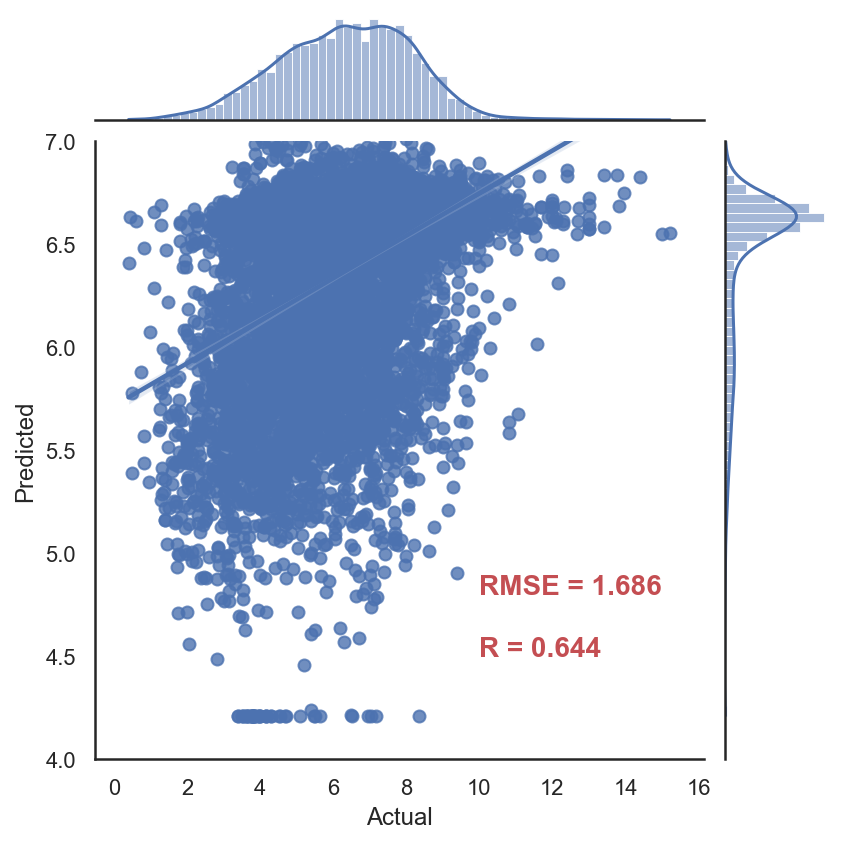

In [88]:
%config InlineBackend.figure_format = 'retina'
plot_joint('data_40/1/train.txt')

(285,)
0.8079368973703998


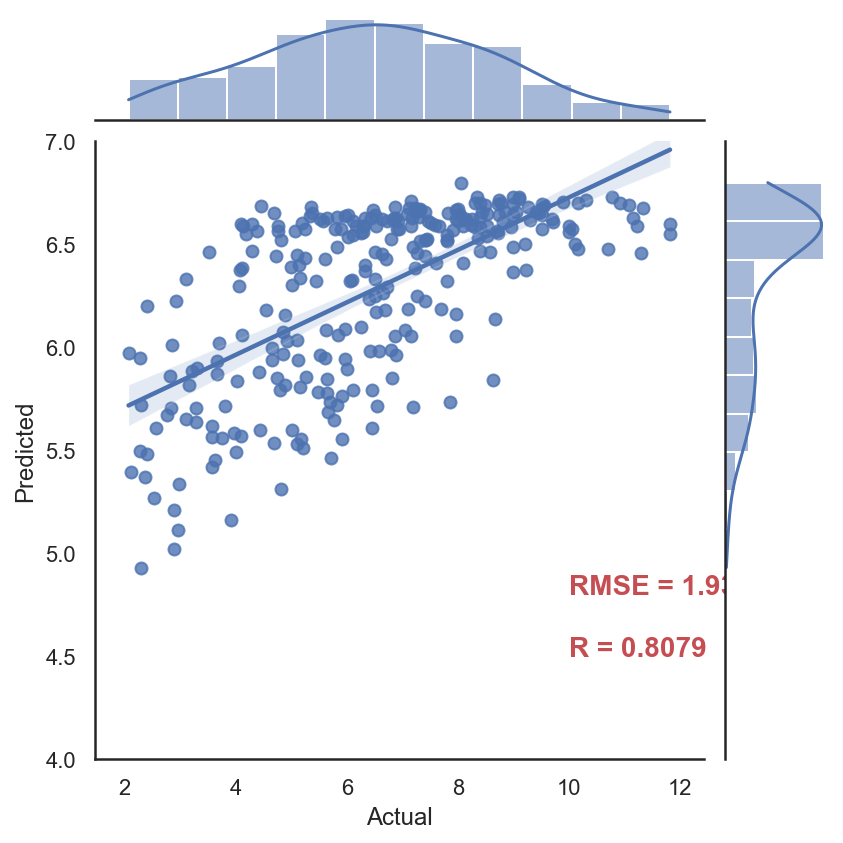

In [89]:
%config InlineBackend.figure_format = 'retina'
plot_joint('data_40/1/test.txt')

(2559,)
0.653892724373779


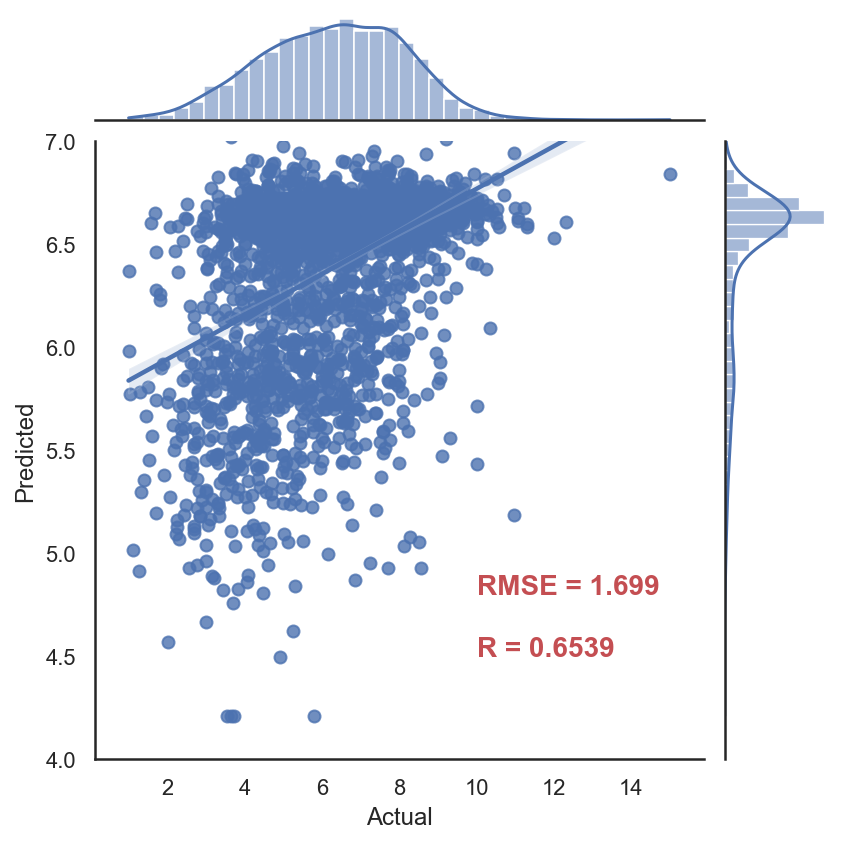

In [90]:
%config InlineBackend.figure_format = 'retina'
plot_joint('data_40/1/validation.txt')

In [40]:
df_30 = pd.read_csv('data_30/test.txt', sep = '\t', header=None)
df_30.columns =['Actual', 'Predicted']
df_30['bins'] = 'nbins=30'
df_40 = pd.read_csv('data_40/test.txt', sep = '\t', header=None)
df_40.columns =['Actual', 'Predicted']
df_40['bins'] = 'nbins=40'
df_50 = pd.read_csv('data_50/test.txt', sep = '\t', header=None)
df_50.columns =['Actual', 'Predicted']
df_50['bins'] = 'nbins=50'
all_data = [df_30, df_40, df_50]
df = pd.concat(all_data, keys=['Actual', 'Predicted', 'bins'],ignore_index=True)

In [41]:
df.tail()

,Actual,Predicted,bins
850,4.30,6.645348,nbins=50
851,5.72,6.579373,nbins=50
852,6.26,6.687363,nbins=50
853,4.69,6.712094,nbins=50
854,7.59,6.745692,nbins=50


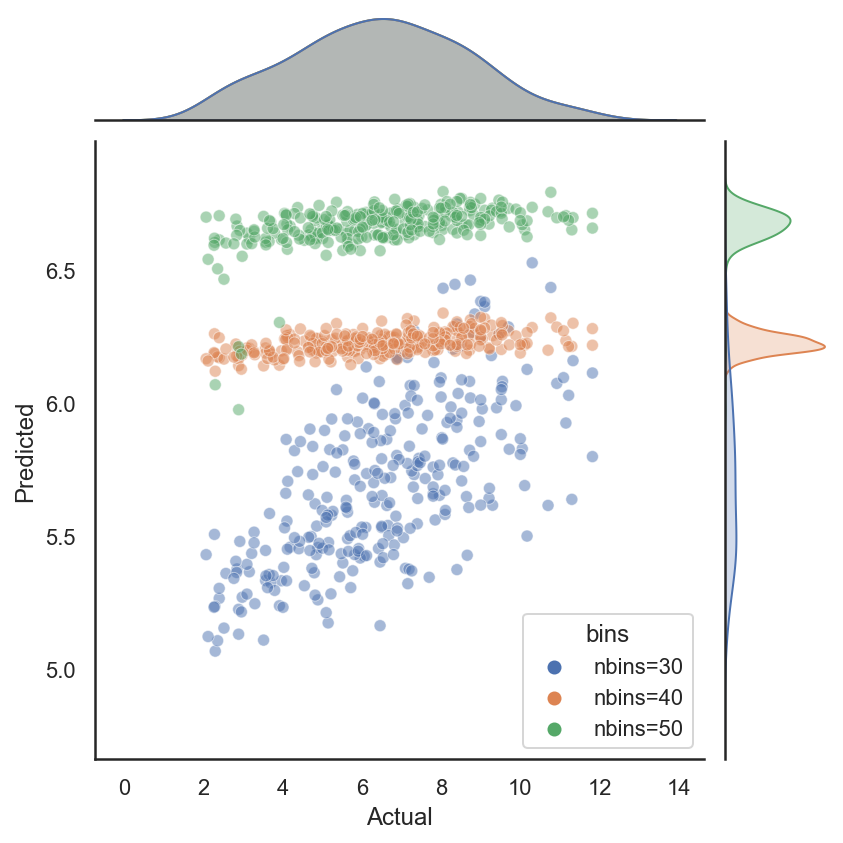

In [42]:
%config InlineBackend.figure_format = 'retina'

sns.jointplot(data=df, x="Actual", y='Predicted', hue='bins', joint_kws={'alpha': 0.5})

In [93]:
df_30 = pd.read_csv('data_40/validation.txt', sep = '\t', header=None)
df_30.columns =['Actual', 'Predicted']
df_30['bins'] = 'old'
df_40 = pd.read_csv('data_40/1/validation.txt', sep = '\t', header=None)
df_40.columns =['Actual', 'Predicted']
df_40['bins'] = 'new'

all_data = [df_30, df_40]
df = pd.concat(all_data, keys=['Actual', 'Predicted', 'bins'],ignore_index=True)

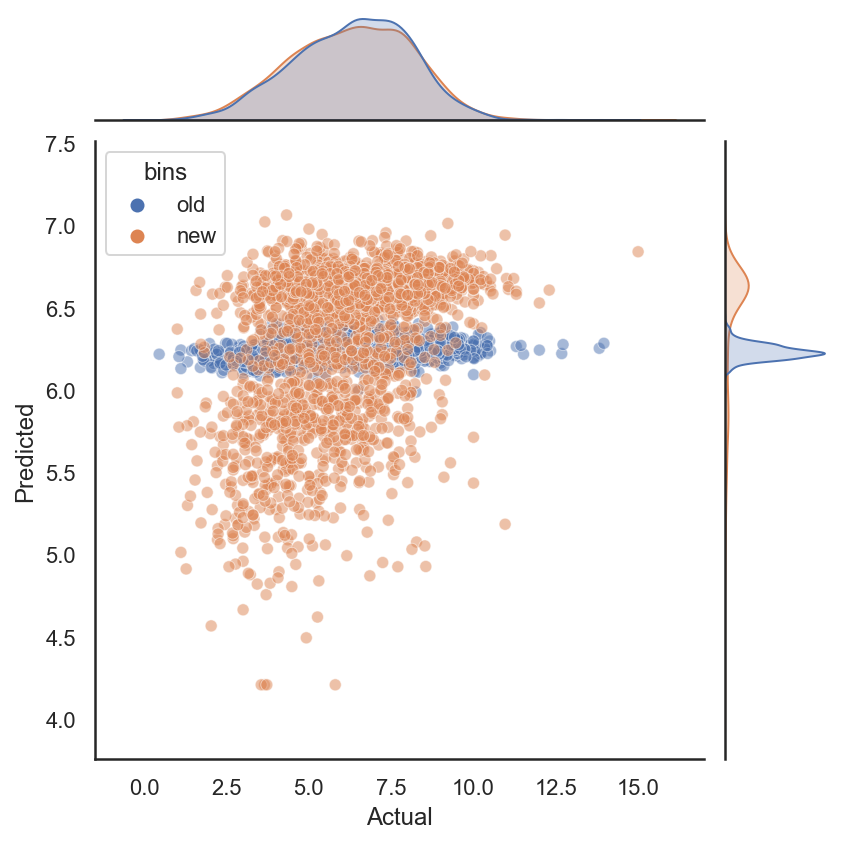

In [94]:
%config InlineBackend.figure_format = 'retina'

sns.jointplot(data=df, x="Actual", y='Predicted', hue='bins', joint_kws={'alpha': 0.5})

In [106]:
df = pd.read_csv('./data_40/1/training.txt', sep = ',', header=None)
df.head()

,0,1,2,3,4,5,6
0,0,2.98,9.96,0.0,1.84,3.55,0.0
1,1,2.27,5.46,0.0,1.83,3.50,0.0
2,2,2.03,4.40,0.0,1.84,3.57,0.0
3,3,1.93,3.94,0.0,1.80,3.41,0.0
4,4,1.87,3.71,0.0,1.79,3.35,0.0


In [107]:
df.columns = ['iteration', 'train_rmse', 'train_mse', 'train_loss', 'val_rmse', 'val_mse', 'val_loss']

In [108]:
df.head()

,iteration,train_rmse,train_mse,train_loss,val_rmse,val_mse,val_loss
0,0,2.98,9.96,0.0,1.84,3.55,0.0
1,1,2.27,5.46,0.0,1.83,3.50,0.0
2,2,2.03,4.40,0.0,1.84,3.57,0.0
3,3,1.93,3.94,0.0,1.80,3.41,0.0
4,4,1.87,3.71,0.0,1.79,3.35,0.0


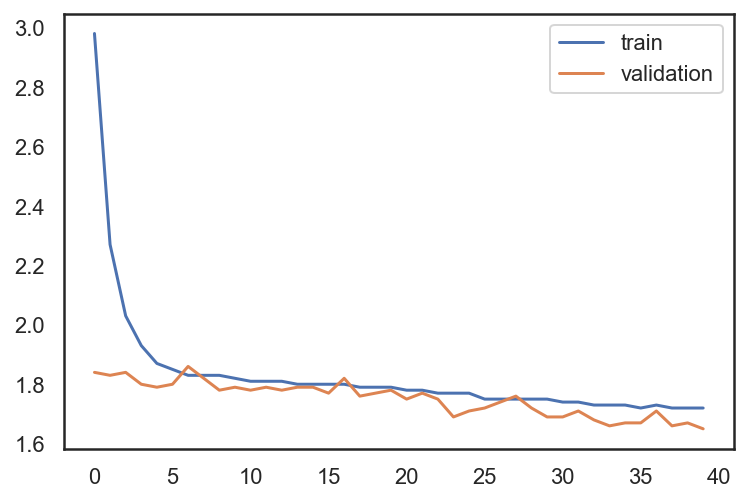

In [115]:
plt.plot(df.iteration.values, df.train_rmse.values, label='train')
plt.plot(df.iteration.values, df.val_rmse.values, label = 'validation')
plt.legend()